In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/churn_prediction_simple.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
# Seprating the data set on the basis of dependent and independent variable
X = data.drop(columns=['churn','customer_id'])
Y = data['churn']

In [5]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [6]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## Model Buiding , Predictions

In [7]:
data.churn.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22062    False
22063    False
22064    False
22065    False
22066    False
Name: churn, Length: 22067, dtype: bool

In [8]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight='balanced')
classifier=DTC()

In [9]:
classifier.fit(x_train,y_train)
prediction_values = classifier.predict(x_train)

In [10]:
prediction_values[:30]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1])

In [11]:
# Evalution Metrics
from sklearn.metrics import classification_report
print(classification_report(y_train,prediction_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



Conclusion: It is perfectly showing value of 1 in every field. Hence it has shown good job in learning from training data. 

In [12]:
# For test set
prediction_values = classifier.predict(x_test)
print(classification_report(y_test,prediction_values))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3559
           1       0.42      0.44      0.43       855

    accuracy                           0.77      4414
   macro avg       0.64      0.65      0.64      4414
weighted avg       0.78      0.77      0.78      4414



Numbers decreses for test data.

### Overfitting
If the model is performing too well on the training data but the performance drops significantly over the test then it is called overfitting.

### Underfitting
If the model is not learning and consistently performing poorly over the test and the train set then it is called underfitting.

### Best-fit model
If the model performs equally on train and test then it is called best-fit


## Visualising Decision Tree

In [13]:
!pip install graphviz

In [14]:
# from sklearn.tree import export_graphviz
# export_graphviz(decision_tree = classifier,out_file='tree_viz',max_depth=None,feature_names=X.columns,
#                 label=None,impurity=False)

In [15]:
# from graphviz import render
# render(filepath='tree_viz',format='png',engine='neato')

Our model is overfitted, as DTC is a non parametric algorithm therefore there are no parameter which can control overfitting, but there are criteria which can do this.Therefore we need to do hyperparameter tuning.

## Hyperparameter Tuning

In [16]:
classifier = DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Max_depth

In [17]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)
  predict = model.predict(x1)
  f1 = f1_score(y1,predict)

  predict = model.predict(x2)
  f2 = f1_score(y2,predict)

  return f1,f2

In [24]:
def effects(train_score,test_score,x_axis,title):
  plt.figure(figsize=(5,7),dpi=100)
  plt.plot(x_axis,train_score,color='red',label='train_score')
  plt.plot(x_axis,test_score,color='blue',label='test_score')
  plt.title(title)
  plt.legend()
  plt.xlabel("Parameter_value")
  plt.ylabel("f1 score")
  plt.show()

In [19]:
max_depth = [i for i in range(1,50)]
train=[]
test=[]

for i in max_depth:
  model = DTC(class_weight='balanced',max_depth=i,random_state=42)
  f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)


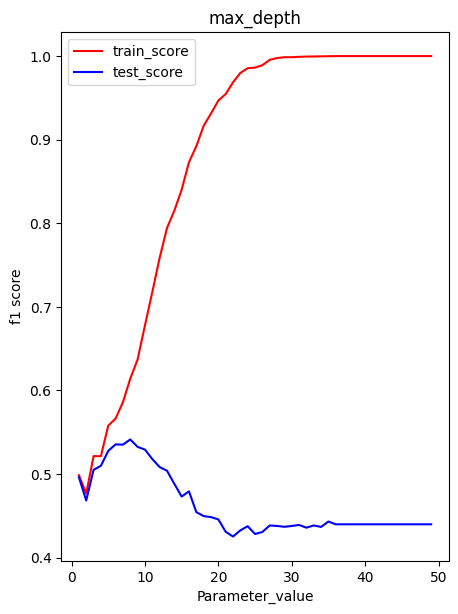

In [25]:
effects(train,test,range(1,50),'max_depth')

## min_samples_split

In [26]:
min_samples = [i for i in range(2,5000, 25)]
train = []
test = []

for i in min_samples:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

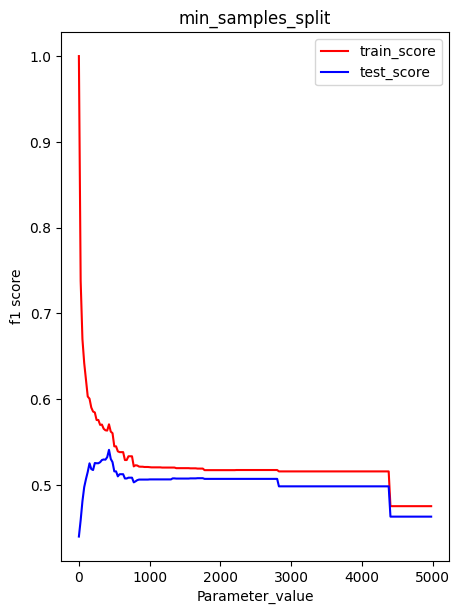

In [27]:
effects(train,test,range(2,5000,25),'min_samples_split')

## Max_leaf_nodes

In [28]:
maxleafnodes = [i for i in range(2,200, 10)]
train = []
test = []

for i in maxleafnodes:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

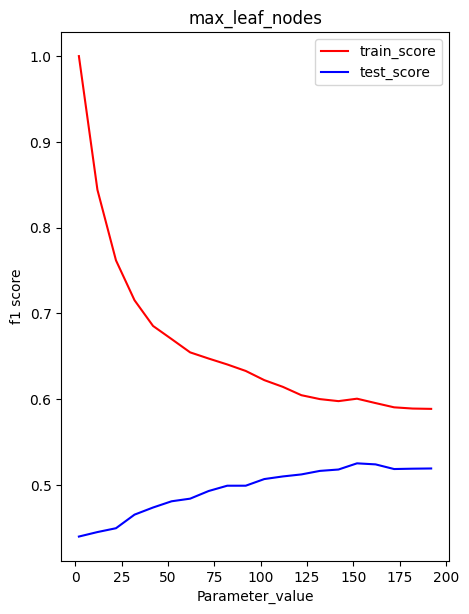

In [29]:
effects(train,test,range(2,200,10),'max_leaf_nodes')

## Min_sample_leaf

In [30]:
minsamplesleaf = [i for i in range(2,4000, 25)]
train = []
test = []

for i in minsamplesleaf:  
  model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

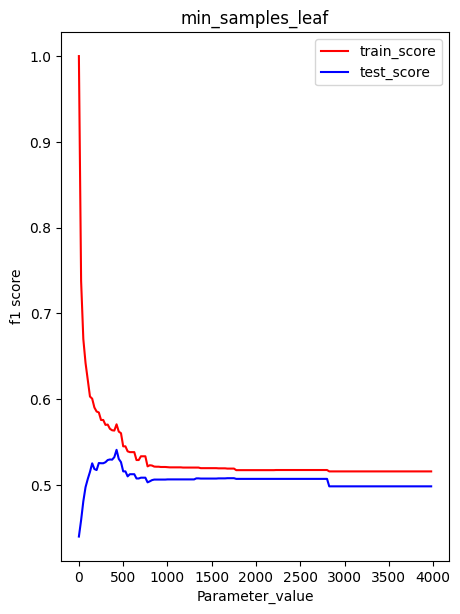

In [31]:
effects(train,test,range(2,4000,25),'min_samples_leaf')

# feature engineering

In [32]:
model =DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

Text(0.5, 1.0, 'Feature Importance')

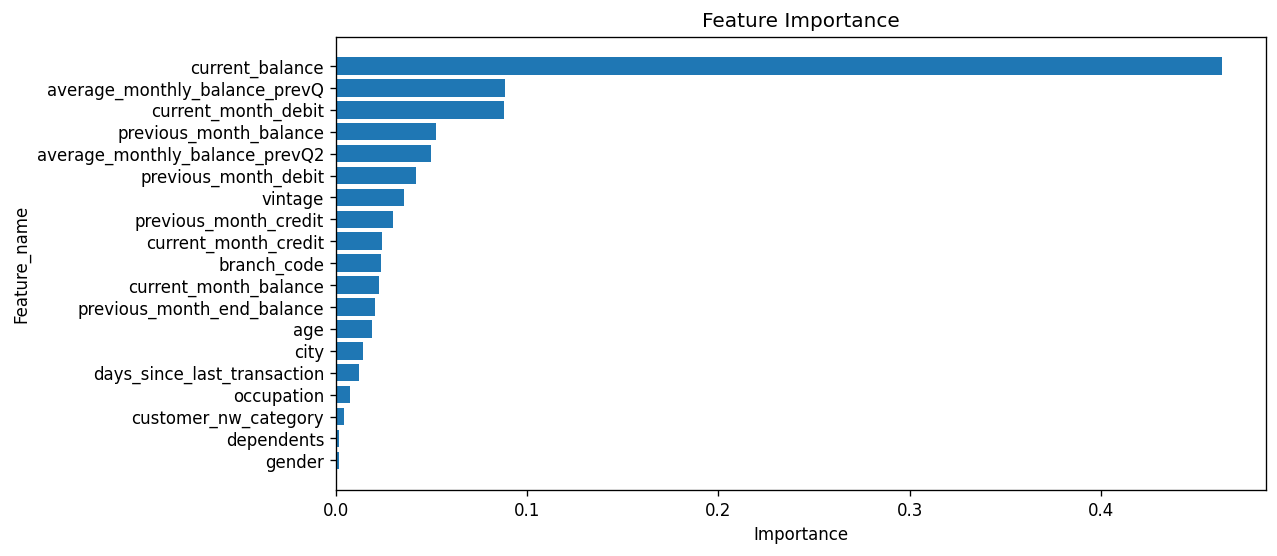

In [33]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel("Importance")
plt.ylabel("Feature_name")
plt.title('Feature Importance')